In [99]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# import sklearn
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [100]:
df=pd.read_csv('/Users/taliyas/Downloads/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [101]:
print("df shape: ", df.shape)
df.isnull().sum()

df shape:  (4981, 11)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [106]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,0.816895,0.0,1.0,1.0,0.000000,1.0,0.801265,0.647564,0.000000,1.0
1,0.0,0.975586,0.0,1.0,1.0,0.000000,0.0,0.234512,0.530086,0.333333,1.0
2,1.0,0.597168,0.0,0.0,1.0,0.000000,1.0,0.536008,0.584527,0.666667,1.0
3,1.0,0.963379,1.0,0.0,1.0,0.333333,0.0,0.549349,0.286533,0.333333,1.0
4,0.0,0.987793,0.0,0.0,1.0,0.000000,1.0,0.605161,0.429799,0.000000,1.0


In [107]:
df = df.sample(frac=1)
# Feature Matrix
x_data = df.iloc[:, :-1].values
# Data labels
y_data = df.iloc[:, -1:].values

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

print("x_train: ", X_train.shape, " y_train: ", Y_train.shape)
X_train

x_train:  (3486, 10)  y_train:  (3486, 1)


array([[1.        , 0.13330078, 0.        , ..., 0.15543348, 0.20916905,
        0.33333333],
       [0.        , 0.0234375 , 0.        , ..., 0.24332933, 0.20630372,
        1.        ],
       [1.        , 0.91455078, 0.        , ..., 0.79221679, 0.85100287,
        0.33333333],
       ...,
       [0.        , 0.36523438, 0.        , ..., 0.18414735, 0.5243553 ,
        0.66666667],
       [1.        , 0.8046875 , 0.        , ..., 0.10022159, 0.34383954,
        0.33333333],
       [1.        , 0.47509766, 0.        , ..., 0.22158619, 0.45558739,
        0.        ]])

In [108]:
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

# Encoding x_orig
oneHot.fit(X_train)
x = oneHot.transform(X_train).toarray()

# Encoding y_orig
oneHot.fit(Y_train)
y = oneHot.transform(Y_train).toarray()

alpha, epochs = 0.0035, 500
m, n = x.shape
print(x.shape)
print('m: ',m, ' n: ', n)
x

(3486, 3379)
m:  3486  n:  3379


array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [130]:
featuresNum = df.shape[1] -1
eps = 1e-12
alpha, epochs = 0.00001, 1000

def logistic_fun(z):
    return 1/(1.0 + np.exp(-z))

X = tf.placeholder(tf.float32, [None, featuresNum])
Y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([featuresNum,1]))
b = tf.Variable(tf.zeros([1]))

Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                    logits = Y_hat, labels = Y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
print()
for i in range(1000):
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b)   # Optimized Bias
    sess.run(optimizer, feed_dict = {X:X_train, Y_:Y_train})
    c = sess.run(loss, feed_dict = {X : X_train, Y_ : Y_train})

    print(Y_hat)
    # a = np.array(Y_hat)
    # print(y_pred)





    # accuracy = tf.summary.scalar("accuracy", accuracy)
    # correct_prediction = tf.equal(tf.argmax(Y_hat, 1),tf.argmax(Y_, 1))
    # accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))







# init = tf.global_variables_initializer()
#
# print(X_train)
#
# # Starting the Tensorflow Session
#
#
#
#
#
#
#
#
#
#
#
#
# with tf.Session() as sess:
#
#     # Initializing the Variables
#     sess.run(init)
#
#     # Lists for storing the changing Cost and Accuracy in every Epoch
#     cost_history, accuracy_history = [], []
#
#     # Iterating through all the epochs
#     for epoch in range(epochs):
#         cost_per_epoch = 0
#
#         # Running the Optimizer
#         sess.run(optimizer, feed_dict = {X : X_train, Y_ : Y_train})
#
#         # Calculating cost on current Epoch
#         c = sess.run(loss, feed_dict = {X : X_train, Y_ : Y_train})
#
#         # Calculating accuracy on current Epoch
#         correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
#                                           tf.argmax(Y_, 1))
#         accuracy = tf.reduce_mean(tf.cast(correct_prediction,
#                                                  tf.float32))
#
#         # Storing Cost and Accuracy to the history
#         cost_history.append(sum(sum(c)))
#         accuracy_history.append(accuracy.eval({X : X_train, Y_ : Y_train}) * 100)
#
#         # Displaying result on current Epoch
#         if epoch % 10 == 0 and epoch != 0:
#             print("Epoch " + str(epoch) + " Cost: "
#                             + str(cost_history[-1])+ ' accuracy: ' , accuracy.eval({X : X_train, Y_ : Y_train}) * 100 )
#
#     Weight = sess.run(W) # Optimized Weight
#     Bias = sess.run(b)   # Optimized Bias
#
#     # Final Accuracy
#     correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
#                                       tf.argmax(Y_, 1))
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction,
#                                              tf.float32))
#     print("\nAccuracy:", accuracy_history[-1], "%")


Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_32:0", shape=(?, 1), dtype=float32)
Tensor("Sig

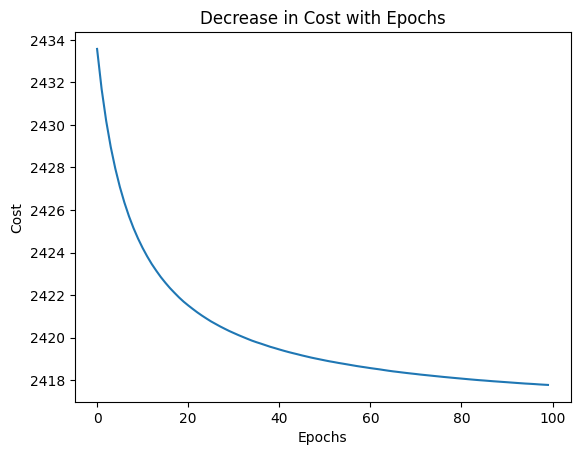

In [88]:

plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')
plt.show()